<a href="https://colab.research.google.com/github/AroraVartika/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project:** **Hotel Booking Analysis**

This project aims to analyze hotel booking data to gain valuable insights and make informed business decisions. The dataset used contains information about hotel bookings, including reservation details, customer demographics, booking behavior, and more.

# **Lets Begin!!**

Firstly Import necessary libraries and Data

In [ ]:
# Importing necessary libraries and data

# For data manupulation and numeric operations
import numpy as np
import pandas as pd

# Data Vizualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For loading the dataset
from google.colab import drive
drive.mount('/content/drive')

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# loading our hotel data
original_data = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')
# Lets create a copy of original Dataset and we will work on the copy data.
# Its always better to work on the copy dataset to avaoid accidental loss of data.
hotel = original_data.copy()
hotel.head() # checking if the dataset is loaded successfully or not

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Understanding Data**

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From inital data exploration we see that the dataset consists of both numerical and categorical values. There are even some datetime values stored in the form of object category, which we need to change into proper format. Also there are some categorical variables stored in the form of numerical variables.
  The other thing that we see is that there are some missing values. We will explore the data further and treat the columns with missing values appropriately.
* Lets understand what are the columns:-


1.   **ADR**(*Numeric*): Average Daily Rate defined as - Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
2.   **Adults**(*Integer*): Number of adults
3.   **Agent**(*Categorical*): ID of the travel agency that made the bookings.
4.   **ArrivalDateDayOfMonth**(*Integer*): Day of the month of the arrival date.
5.   **ArrivalDateMonth**(*Categorical*): Month of arrival date with 12 categories (January to December).
6.   **ArrivalDateWeekNumber**(*Integer*):Week number of the arrival date.
7.   **ArrivalDateYear**(*Integer*): Year of arrival date.
8. **AssignedRoomType** (*Categorical*): Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
9. **babies** (*Integer*) :Number of babies.
10. **BookingChanges** (*Integer*): Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date,nights, reserved room type or meal.
11. **Children** (*Integer*): Number of children. Sum of both payable and non-payable children.
12. **Company**(*Categorical*): ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
13. **Country**(*Categorical*): Country of origin.
14. **CustomerType**(*Categorical*):Type of booking, assuming one of four
categories:-
*   Contract - when the booking has an allotment or other type of contract associated to it.
*   Group – when the booking is associated to a group
*   Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
*   Transient-party – when the booking is transient, but is associated to at least other transient booking.
15. **DaysInWaitingList**(*Integer*):Number of days the booking was in the waiting list before it was confirmed to the customer. Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS.
16. **DepositType**(*Categorical*):  Indication on if the customer made a
deposit to guarantee the booking. This variable can assume three categories:-
* No Deposit – no deposit was made.
* Non Refund – a deposit was made in the value of the total stay cost.
* Refundable – a deposit was made with a value under the total cost of stay.
17. **DistributionChannel**(*Categorical*): Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
18. **IsCanceled**(*Categorical*): Value indicating if the booking was canceled (1) or not (0).
19. **IsRepeatedGuest**(*Categorical*): Value indicating if the booking name was from a repeated guest (1) or not (0).
20. **LeadTime**(*Integer*): Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. Subtraction of the entering date from the arrival date.
21. **MarketSegment**(*Categorical*): Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
22. **Meal**(*Categorical*): Type of meal booked. Categories are presented in standard hospitality meal packages.
* Undefined/SC – no meal package.
* BB – Bed & Breakfast.
* HB – Half board (breakfast and one other meal – usually dinner).
* FB – Full board (breakfast, lunch and dinner)
23. **PreviousBookingsNotCanceled**(*Integer*): Number of previous bookings not cancelled by the customer prior to the current booking.
24. **PreviousCancellations**(*Integer*): Number of previous bookings that were
cancelled by the customer prior to the current booking.
25. **RequiredCardParkingSpaces**(*Integer*): Number of car parking spaces required by the customer.
26. **ReservationStatus**(*Categorical*):Reservation last status, assuming one of three categories:
* Canceled – booking was canceled by the customer.
* Check-Out – customer has checked in but already departed.
* No-Show – customer did not check-in and did inform the hotel of the reason why.
27. **ReservationStatusDate**(*Date*): Date at which the last status was set.
This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
28. **ReservedRoomType**(*Categorical*): Code of room type reserved. Code is
presented instead of designation for anonymity reasons.
29. **StaysInWeekendNights**(*Integer*): Number of weekend nights (Saturday or
Sunday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of weekend nights from the total number of nights.
30. **StaysInWeekNights**(*Integer*): Number of week nights (Monday to Friday the guest stayed or booked to stay at the hotel. Calculated by counting the number of week nights from the total number of nights.
31. **TotalOfSpecialRequests**(*Integer*): Number of special requests made by the customer (e.g. twin bed or high floor). Sum of all special requests.

The information about the columns of the dataset was found from the following link:
[Hotel Dataset Columns Information](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0040)










## **Data Cleaning**

**Dropping the columns that we dont need.**

In [ ]:
hotel.drop(hotel[['reservation_status_date','days_in_waiting_list','booking_changes','previous_bookings_not_canceled',
                   'previous_cancellations','arrival_date_week_number']], axis=1, inplace=True)
hotel.shape

(119390, 26)

**Dealing with Duplicate Values.**

In [ ]:
# Lets check the shape of the data and then check for duplicate data and remove them if any.
print('The shape of the data is :', hotel.shape)
print('The shape of the duplicated data is :',hotel[hotel.duplicated()].shape)
hotel.drop_duplicates(inplace = True)
print('The shape of the hotel data after removing duplicate entries is :', hotel.shape)

The shape of the data is : (119390, 26)
The shape of the duplicated data is : (33060, 26)
The shape of the hotel data after removing duplicate entries is : (86330, 26)


**Dealing with Missing values**

In [ ]:
# Checking for Missing Values
pd.concat([hotel.isnull().sum(),round(100*(hotel.isnull().sum()/len(hotel)),2)], axis=1, keys=['Missing Values', '% Missing Values'])
# Creating a dataframe that has number of missing values and % of missing values.

,Missing Values,% Missing Values
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00
children,4,0.00


In [ ]:
# Sorting the null values in a descending manner
hotel.isnull().sum().sort_values(ascending = False)[:5]

company     81241
agent       11910
country       449
children        4
hotel           0
dtype: int64

In [ ]:
# Dropping the company columns and verifying it
hotel.drop(hotel[['company']], axis=1, inplace=True)
print('Company Column in Dataset : ','company' in hotel.columns) #Checking if we have successfully dropped company column from the dataset
print('_'*75)

#  Lets treat the missing values in agent column
hotel['agent'] = hotel['agent'].fillna(0) # Imputing 0 to represent that the bookings were not done through any agent.
hotel['agent'] = hotel['agent'].astype('int').astype('str') # Changing the datatype as its a categorical data.
print('The missing values in agent columns are : ',hotel['agent'].isnull().sum())
print('The dtype of agent column is : ', hotel['agent'].dtype)
print('_'*75)

# Lets treat the missing values in childrens column
hotel['children'] = hotel['children'].fillna(hotel['children'].median())
hotel['children'] = hotel['children'].astype('int') #Changing the dtype to int as childrens cant be in fractions.
print('The Missing Values in children column are : ', hotel['children'].isnull().sum())
print('The dtype of children column is : ', hotel['children'].dtype)
print('_'*75)

# Lets treat the missing values in country column
hotel['country'] = hotel['country'].fillna('OTH') #OTH Represents visitors from unknown countries.
print('The missing values in country column are : ', hotel['country'].isnull().sum())
print('The dtype of country column is : ', hotel['country'].dtype)
print('_'*75)

Company Column in Dataset :  False
___________________________________________________________________________
The missing values in agent columns are :  0
The dtype of agent column is :  object
___________________________________________________________________________
The Missing Values in children column are :  0
The dtype of children column is :  int64
___________________________________________________________________________
The missing values in country column are :  0
The dtype of country column is :  object
___________________________________________________________________________


In [ ]:
# Lets check if we still have any column with missing values
hotel.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
market_segment                 0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

## **Data Preparation.**

# **Feature Engineering.**

In [ ]:
# Lets create a column by combining day, month and year column to create a new columns 'arrival_date'
from datetime import datetime as dt
hotel['arrival_date'] = hotel['arrival_date_year'].astype('str') + hotel['arrival_date_month'] + hotel['arrival_date_day_of_month'].astype('str')
hotel['arrival_date'] = hotel['arrival_date'].apply(lambda x : dt.strptime(x,'%Y%B%d'))

# Creating a Columns that represents if the customer was assingned the room that was originally booked
hotel['got_preferred_room'] = np.where((hotel['reserved_room_type']==hotel['assigned_room_type']),'1','0')

# Lets calculate length of stay by adding stays_in_weekend_nights and stays_in_week_nights, with that we can compute revenue by multiplying revenue to length of stay.
hotel['length_of_stay'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
hotel['revenue'] = hotel['adr'] * hotel['length_of_stay']

# Calculating total number of guests by adding Adults, babies and childrens.And deleting the rows where total_guests = 0
hotel['total_guests'] = hotel['adults'] + hotel['children'] + hotel['babies']
hotel = hotel.loc[hotel['total_guests']>0]

# Creating a new column to know the season in Portugal.
def season(month):
  if (month == 'March'or month =='April' or month=='May'):
    return 'Spring'
  elif(month =='June' or month == 'July' or month == 'August' or month == 'September'):
    return 'Summer'
  elif(month =='October' or month == 'November' or month == 'December'):
    return 'Autumn'
  else:
    return 'Winter'
hotel['season'] = hotel['arrival_date_month'].apply(season)

# Creating a new column to see the family type.
def family_type(total_guest):
  if(total_guest<2):
    return 'Single'
  elif (total_guest==2):
    return 'Couple'
  else:
    return 'Family/Group'
hotel['family_type'] = hotel['total_guests'].apply(family_type)

# checking the info of the dataset
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86166 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hotel                        86166 non-null  object        
 1   is_canceled                  86166 non-null  int64         
 2   lead_time                    86166 non-null  int64         
 3   arrival_date_year            86166 non-null  int64         
 4   arrival_date_month           86166 non-null  object        
 5   arrival_date_day_of_month    86166 non-null  int64         
 6   stays_in_weekend_nights      86166 non-null  int64         
 7   stays_in_week_nights         86166 non-null  int64         
 8   adults                       86166 non-null  int64         
 9   children                     86166 non-null  int64         
 10  babies                       86166 non-null  int64         
 11  meal                         86166 non-n

**Changing the column types to appropriate column types.**

In [ ]:
# Changing the numerical columns to categorical columns
change_to_object =  ['arrival_date_year','arrival_date_day_of_month','is_repeated_guest','is_canceled']
for col in change_to_object:
  hotel[col] = hotel[col].astype('str')
  print('Successfully changed the ' + col + ' dtype to :',hotel[col].dtype)

Successfully changed the arrival_date_year dtype to : object
Successfully changed the arrival_date_day_of_month dtype to : object
Successfully changed the is_repeated_guest dtype to : object
Successfully changed the is_canceled dtype to : object


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86166 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hotel                        86166 non-null  object        
 1   is_canceled                  86166 non-null  object        
 2   lead_time                    86166 non-null  int64         
 3   arrival_date_year            86166 non-null  object        
 4   arrival_date_month           86166 non-null  object        
 5   arrival_date_day_of_month    86166 non-null  object        
 6   stays_in_weekend_nights      86166 non-null  int64         
 7   stays_in_week_nights         86166 non-null  int64         
 8   adults                       86166 non-null  int64         
 9   children                     86166 non-null  int64         
 10  babies                       86166 non-null  int64         
 11  meal                         86166 non-n

# **Defining Numerical and Categorical Columns.**

In [ ]:
print('Numerical Columns :-')
numerical = hotel.describe().columns
print(numerical)
print('_'*75)
print('Categorical Columns:-')
categorical = hotel.describe(include=['object','category']).columns
print(categorical)
print('_'*75)

Numerical Columns :-
Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'length_of_stay', 'revenue',
       'total_guests'],
      dtype='object')
___________________________________________________________________________
Categorical Columns:-
Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'customer_type',
       'reservation_status', 'got_preferred_room', 'season', 'family_type'],
      dtype='object')
___________________________________________________________________________


# **Exploratory Data Analysis.**

### **Initial Look at the data.**

In [ ]:
# Checking the numerical description of the whole dataset
hotel.describe([0.25,0.50,0.75,0.90,0.95]).T

,count,mean,std,min,25%,50%,75%,90%,95%,max
lead_time,86166.0,79.393345,85.512124,0.00,11.00,49.00,124.0000,203.00,253.0,737.0
stays_in_weekend_nights,86166.0,1.006522,1.027800,0.00,0.00,1.00,2.0000,2.00,2.0,19.0
stays_in_week_nights,86166.0,2.625908,2.041033,0.00,1.00,2.00,4.0000,5.00,6.0,50.0
adults,86166.0,1.881601,0.622282,0.00,2.00,2.00,2.0000,2.00,3.0,55.0
children,86166.0,0.140160,0.458202,0.00,0.00,0.00,0.0000,0.00,1.0,10.0
babies,86166.0,0.010956,0.114298,0.00,0.00,0.00,0.0000,0.00,0.0,10.0
adr,86166.0,106.762066,55.004331,-6.38,72.25,98.84,134.3925,174.67,205.0,5400.0
required_car_parking_spaces,86166.0,0.085057,0.282810,0.00,0.00,0.00,0.0000,0.00,1.0,8.0
total_of_special_requests,86166.0,0.702493,0.832606,0.00,0.00,1.00,1.0000,2.00,2.0,5.0
length_of_stay,86166.0,3.632430,2.744630,0.00,2.00,3.00,5.0000,7.00,8.0,69.0


Inferences from basic describe function
The median Lead time for the hotels was observed as 49 days.
It is noticed that mostly couples tend to travel without any childrens or babies.
It is evident that the customers are the first time visitors.
The median ADR was recorded at 98.84 Euros and the median revenue generated by the hotels was 299.20 EUROS.
The median Length was 3 days





# **Outlier Analysis for Hotels.**

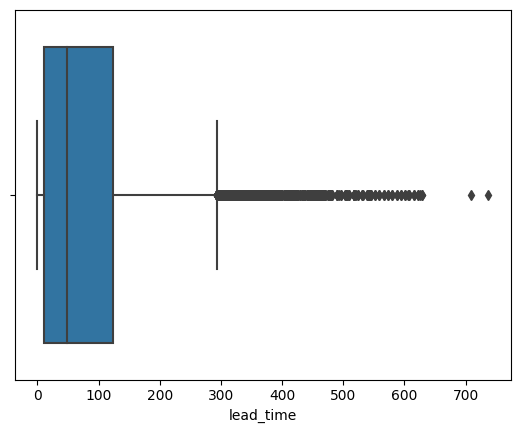

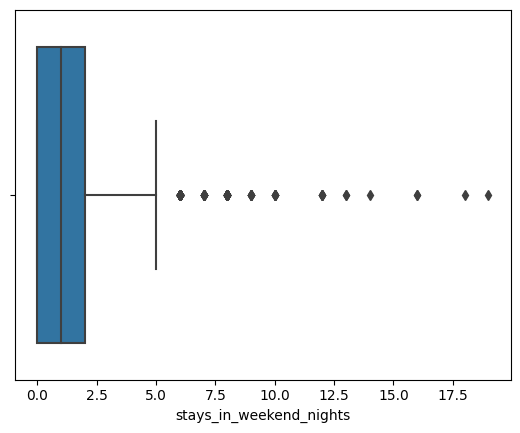

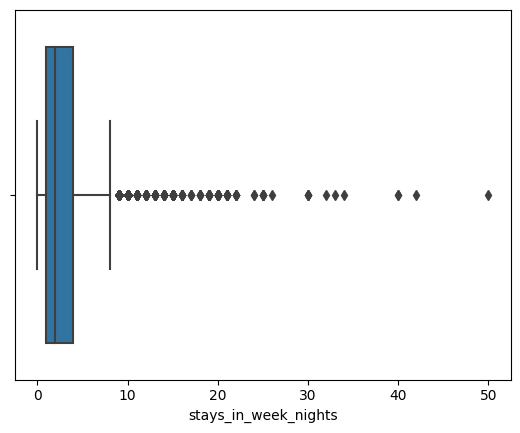

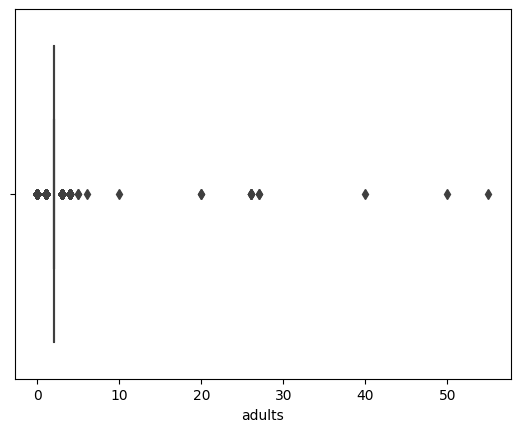

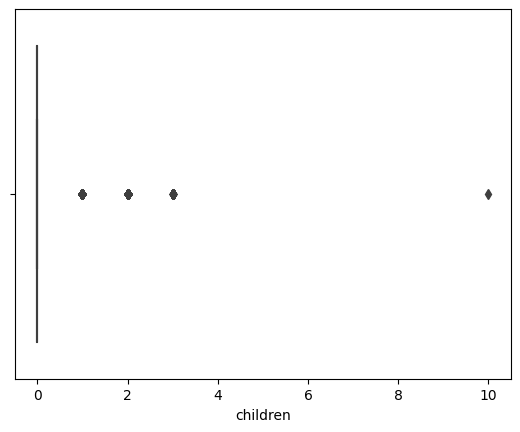

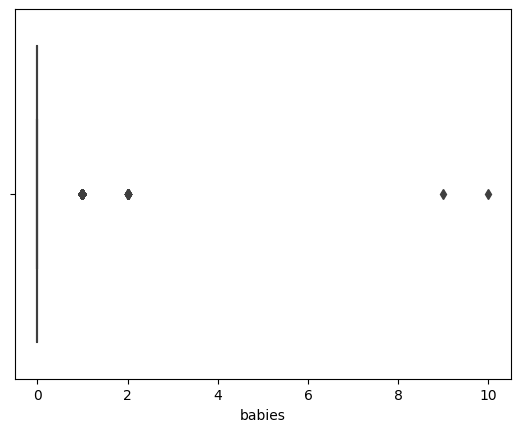

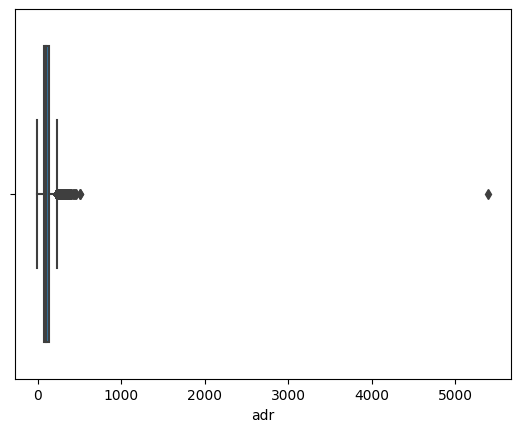

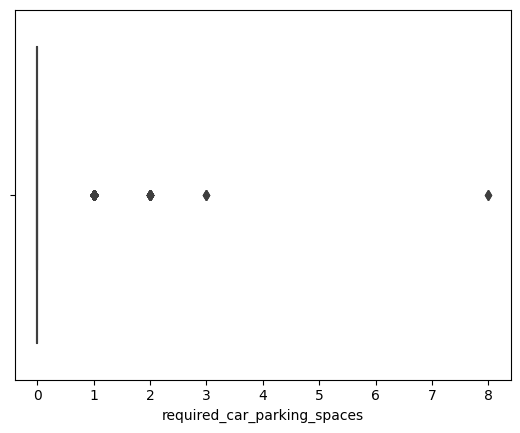

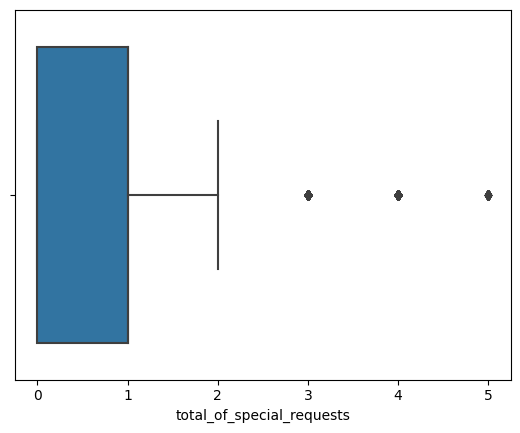

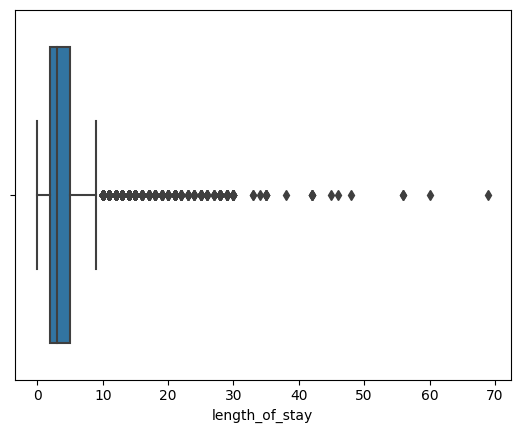

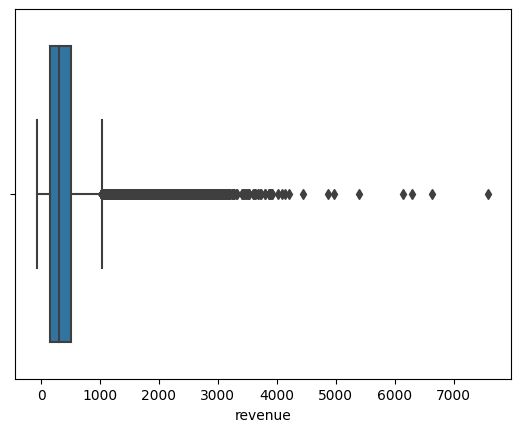

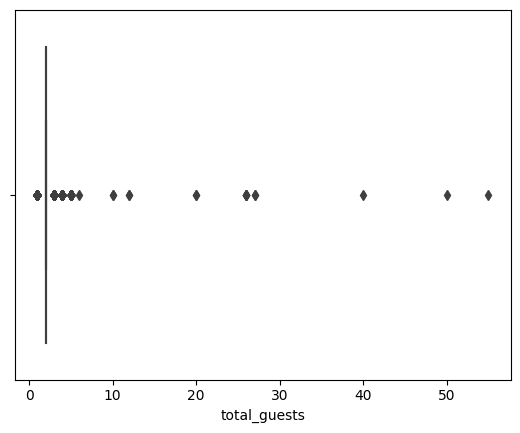

In [ ]:
for col in numerical:
  sns.boxplot(x=hotel[col])
  plt.show()

**Looking at the Distribution of the Data.**

**Univariate Analysis**

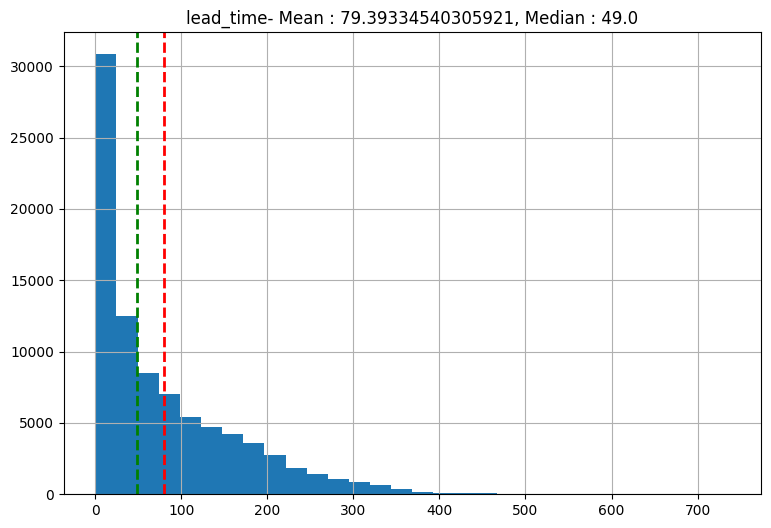

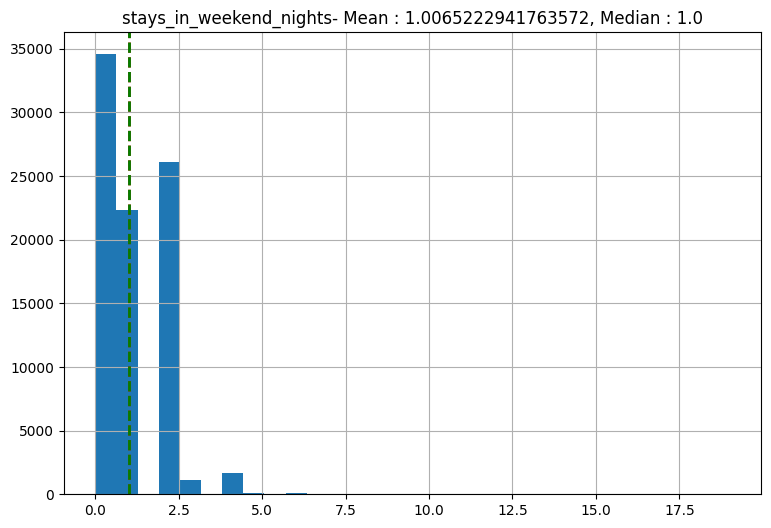

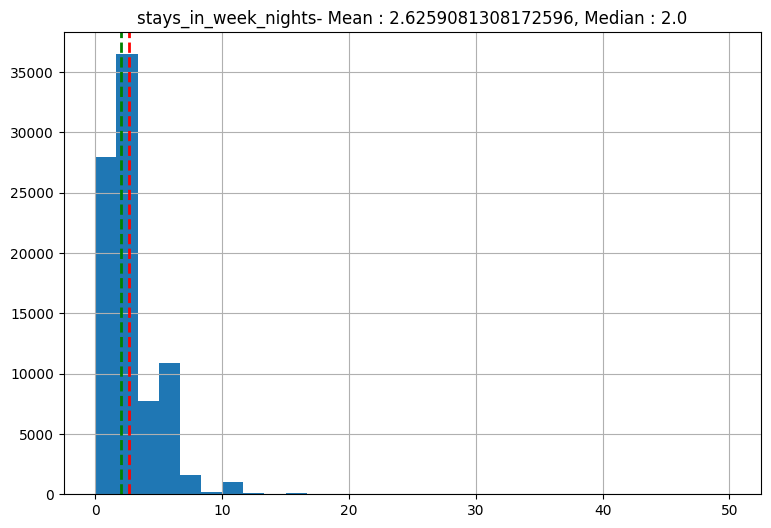

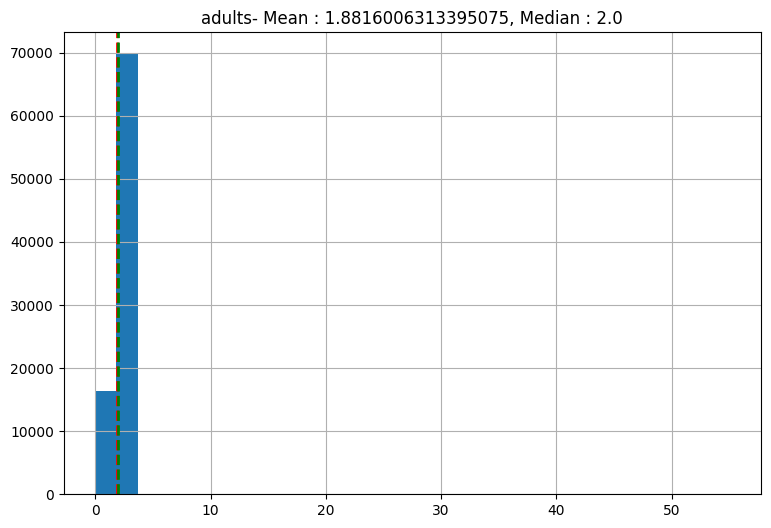

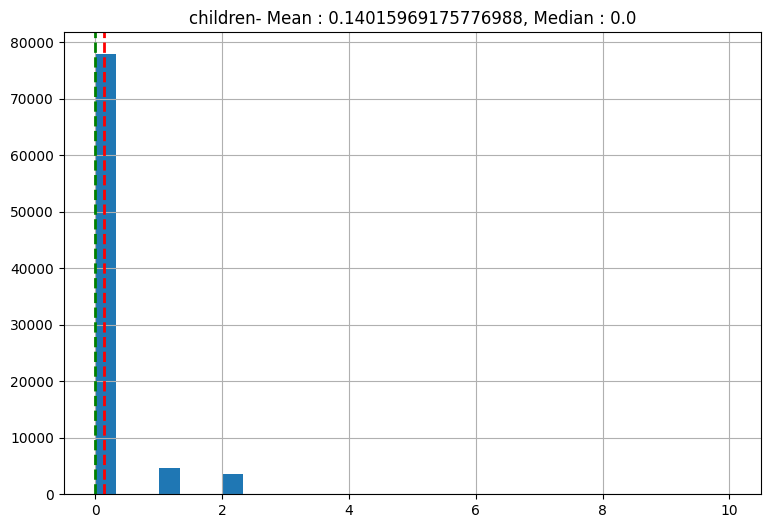

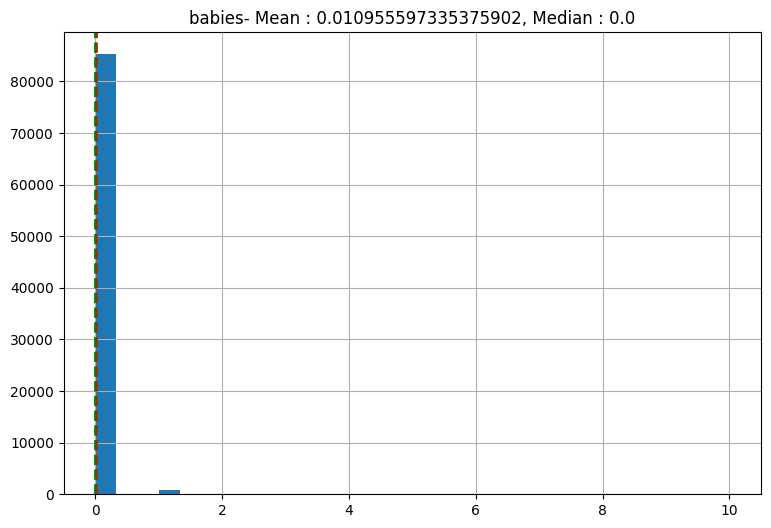

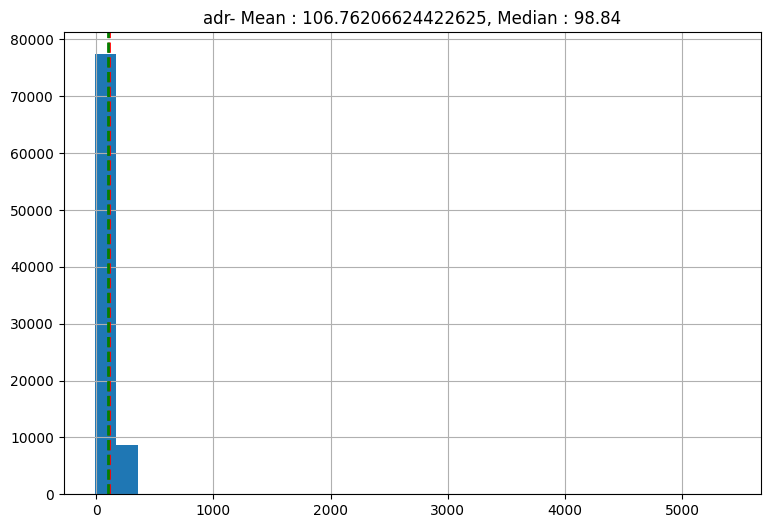

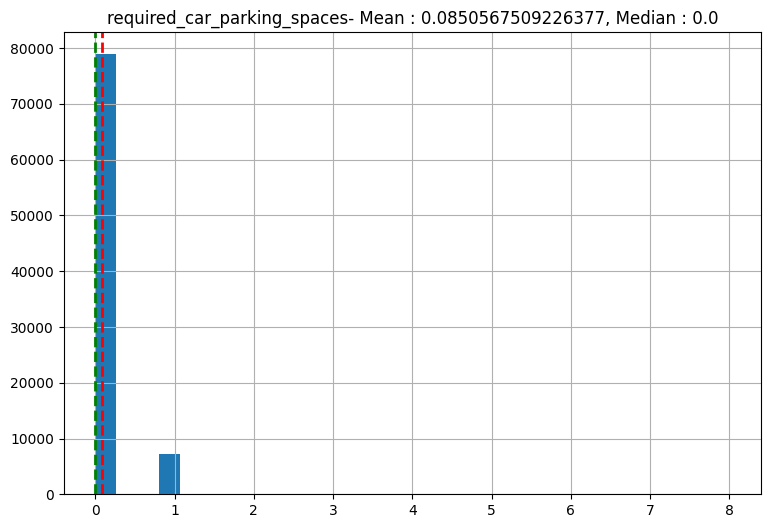

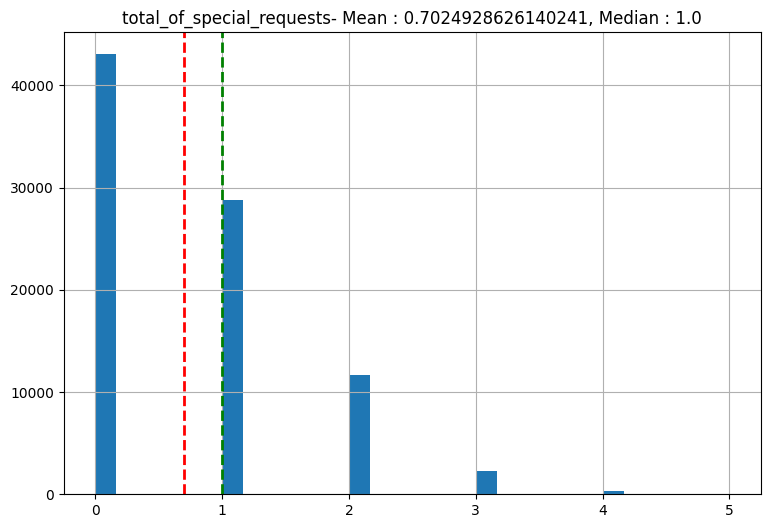

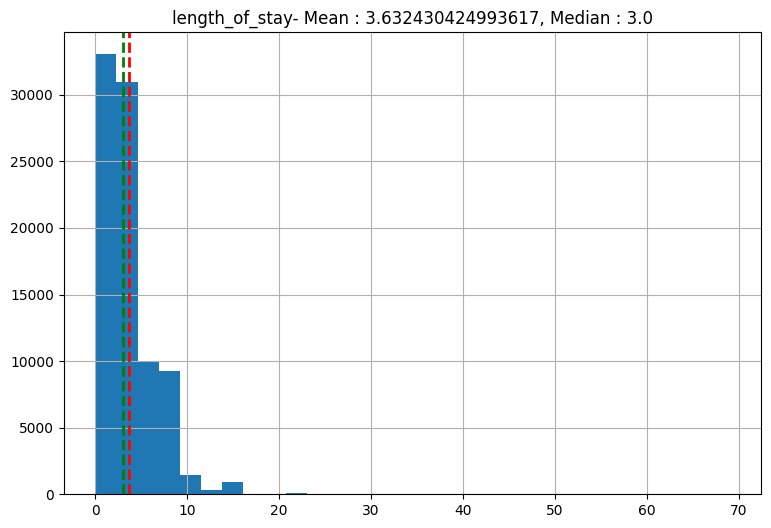

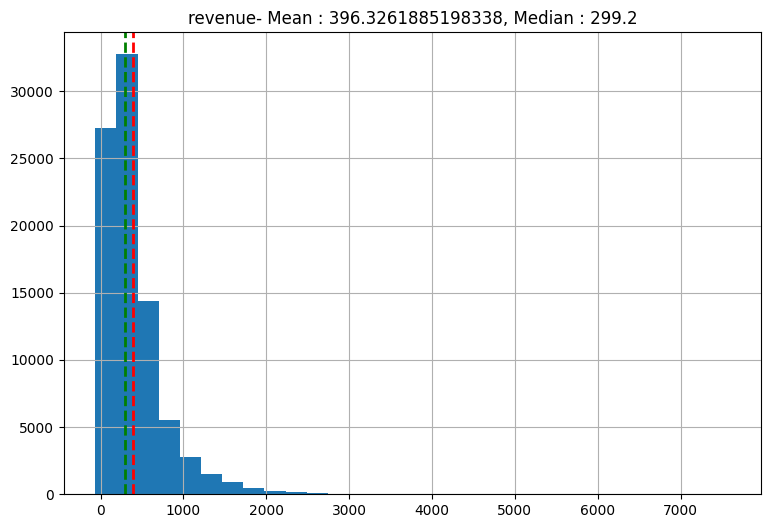

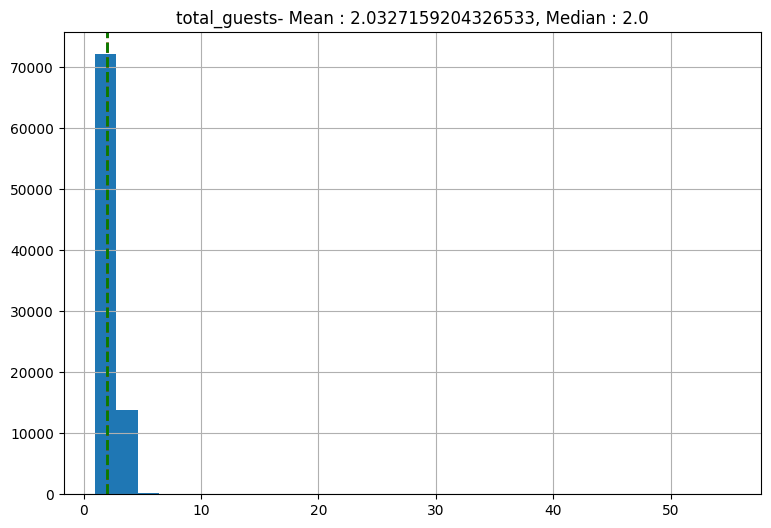

In [ ]:
# plot bar chart for each numerical column with mean and median.
for col in numerical:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = hotel[col]
  feature.hist(bins=30, ax= ax)
  ax.axvline(feature.mean(), color= 'red', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(), color ='green', linestyle='dashed', linewidth=2)
  ax.set_title(col+'- Mean : '+str(feature.mean())+', Median : '+str(feature.median()))
plt.show()

# **Inferences**



*   It is seen that most of the customers book for hotels a month or 2 before
    the arrival date.
*   The hypothesis which we got from the basic description stands true that most of the visitors are couples and prefer to travel without children and babies.



## **Lets explore the relationship of columns and see how it affects Revenue**.





## **Bivariate Analysis**

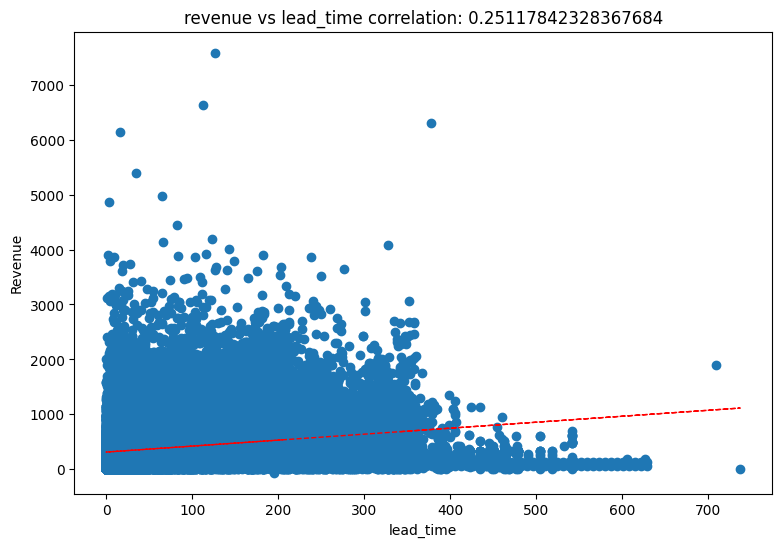

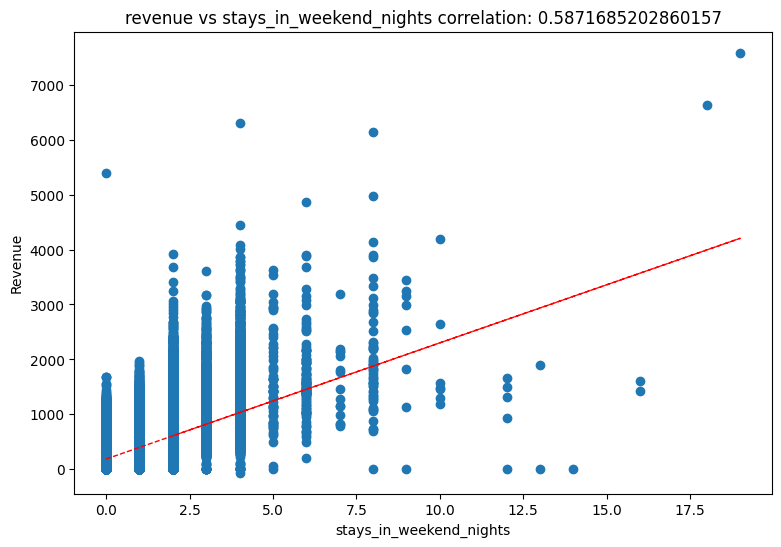

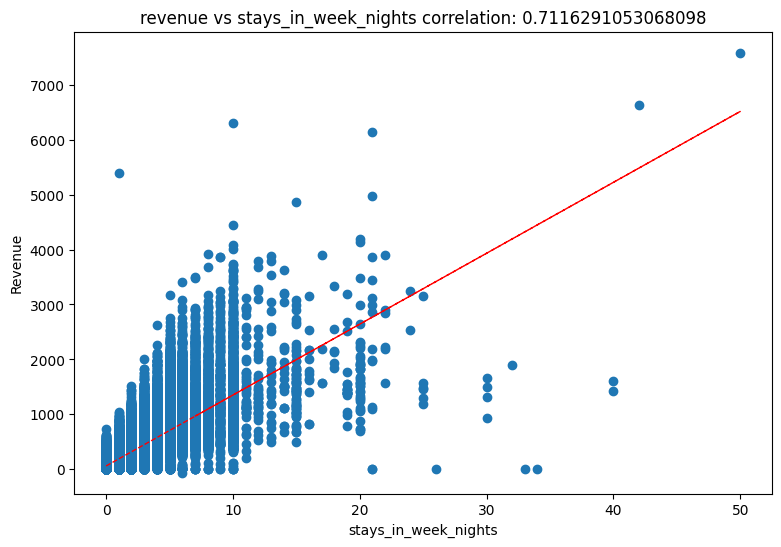

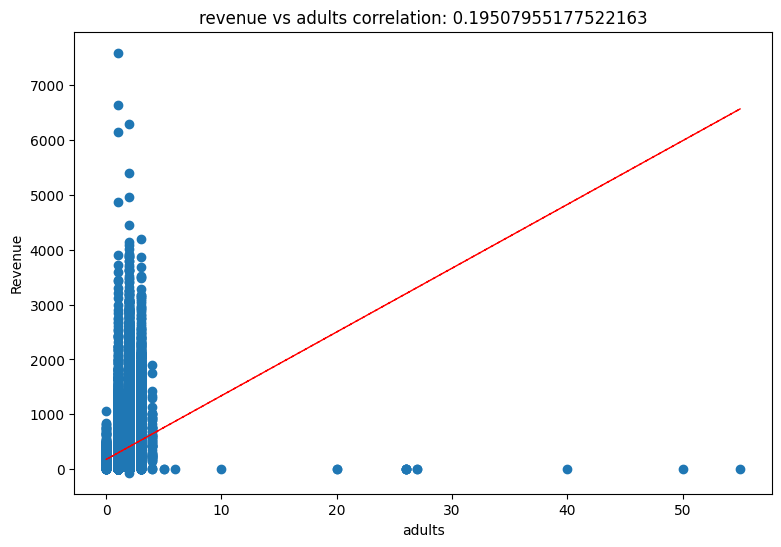

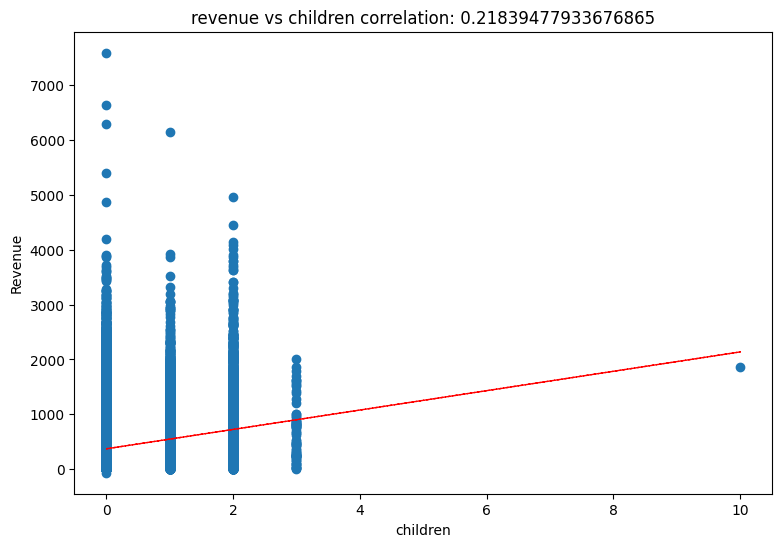

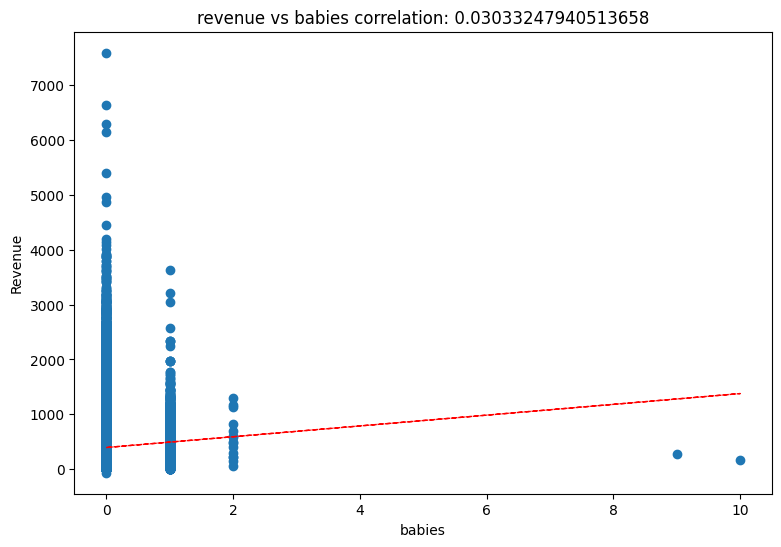

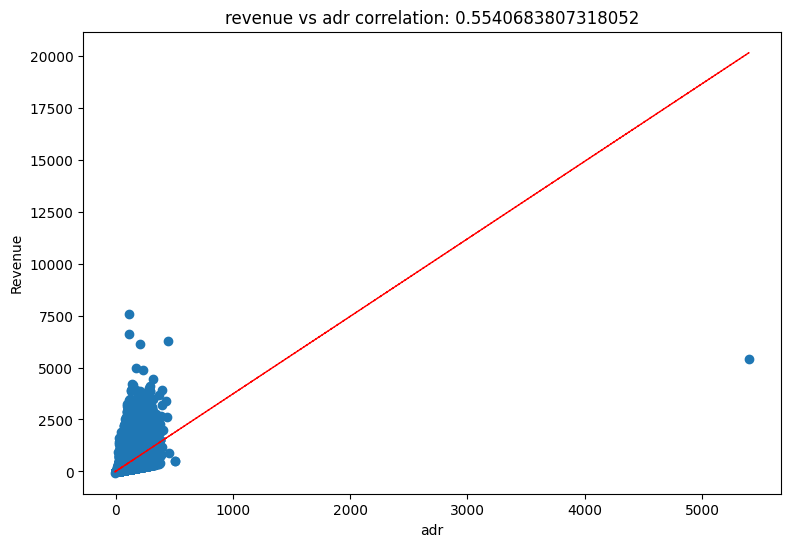

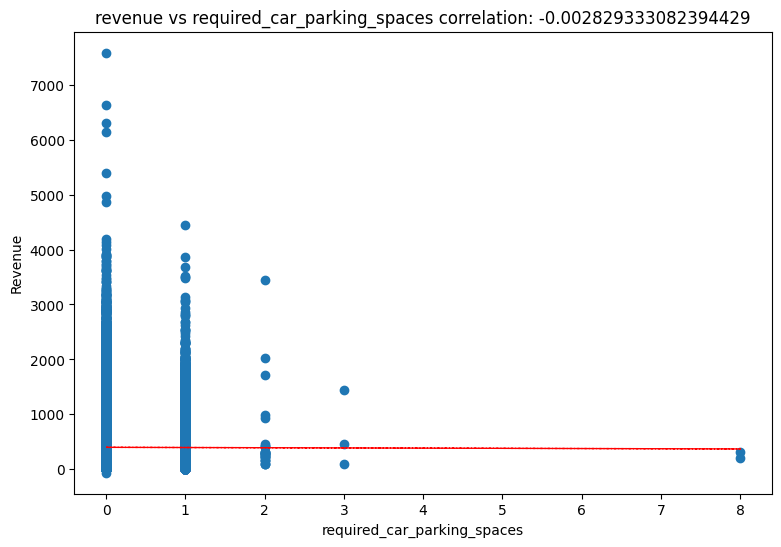

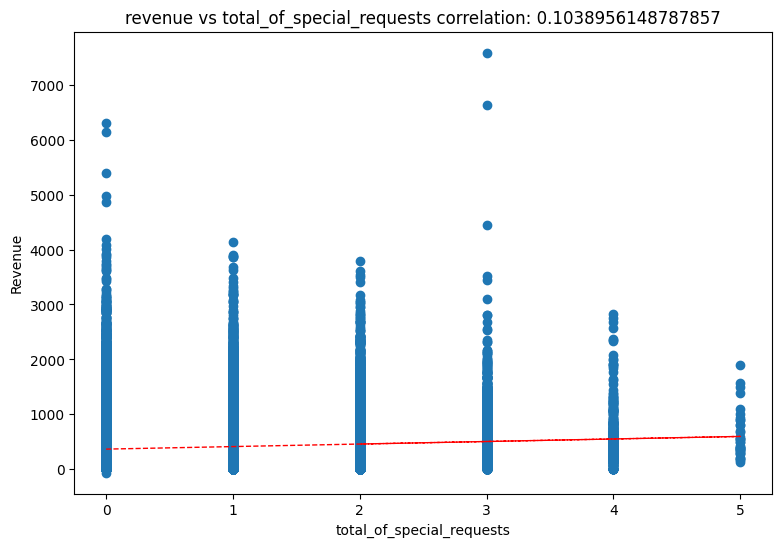

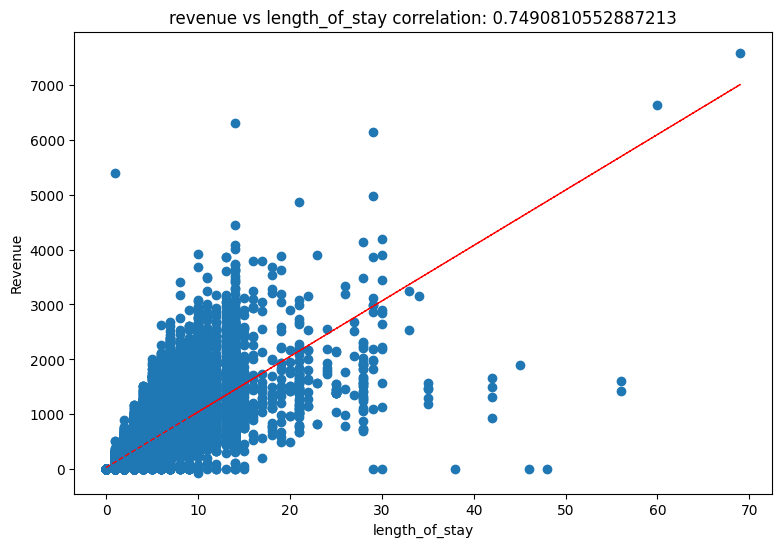

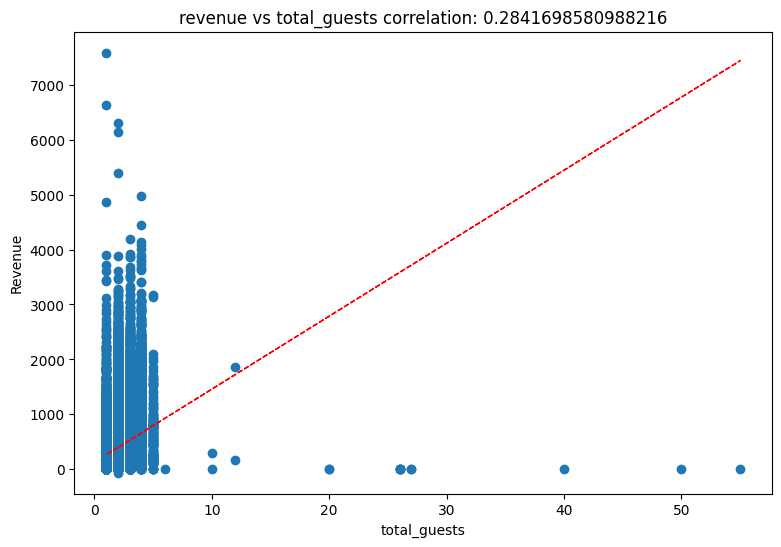

In [ ]:
for col in numerical.drop(['revenue']):
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = hotel[col]
  label = hotel['revenue']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Revenue')
  ax.set_title('revenue vs ' + col + ' correlation: ' + str(correlation))
  z = np.polyfit(hotel[col], hotel['revenue'],1)
  y_hat = np.poly1d(z)(hotel[col])

  plt.plot(hotel[col], y_hat, 'r--', lw=1)

plt.show()

# **Inferences**

# **From the data it is seen that :-**



*   Lead time has almost no effect in determining revenue.

*   stays_in_week_nights has stronger positive correlation with revenue compared to stay_in_weekend_nights.
* It is seen that higher the adr higher the revenue.


*   It is evedent that the length_of_stay is the ultimate factor that affects the revenue.



<Axes: >

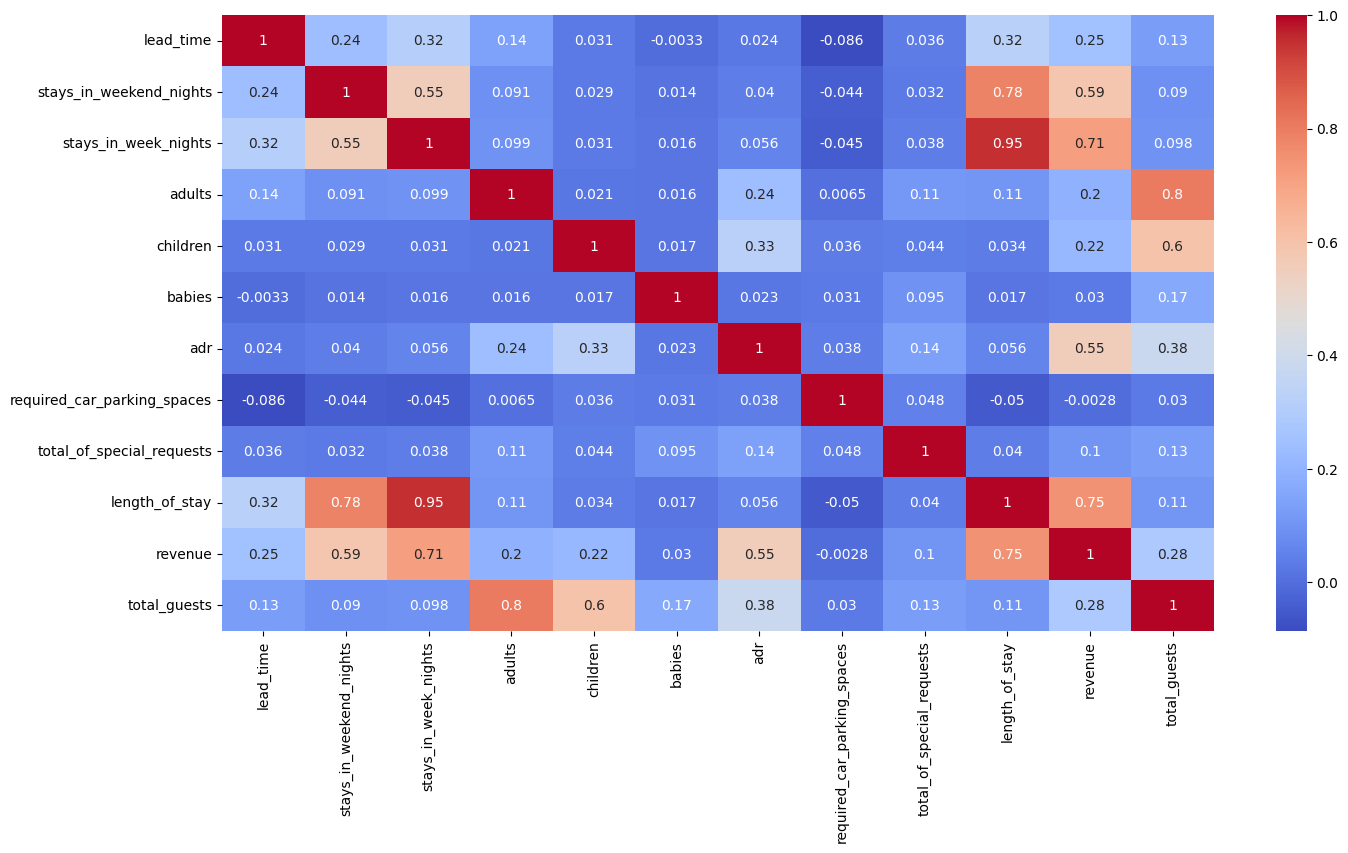

In [ ]:
# Plotting the correlation heatmap
plt.figure(figsize = (16,8))
correlation = hotel.corr()
sns.heatmap(correlation, annot=True, cmap ='coolwarm')

# **Lets explore categorical Variables**

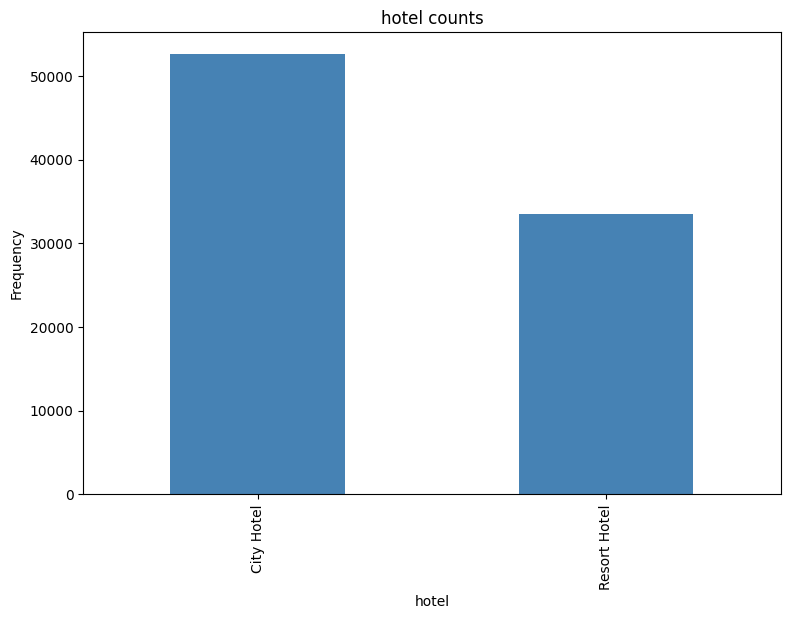

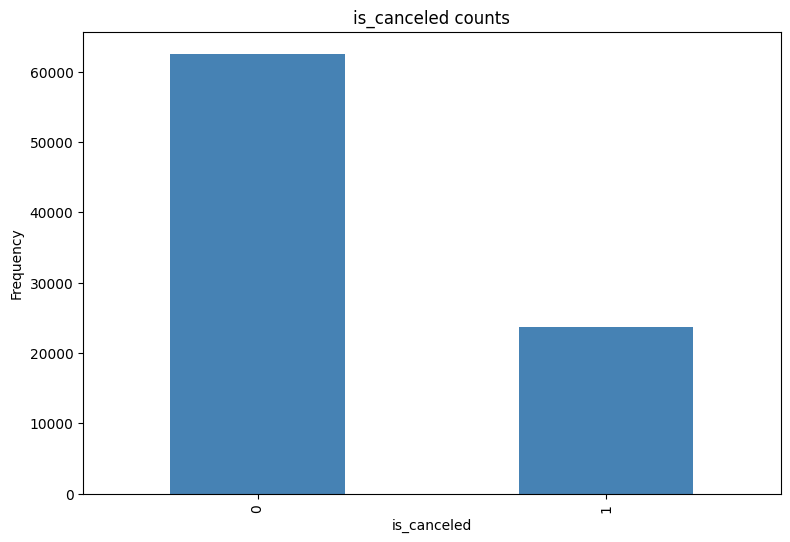

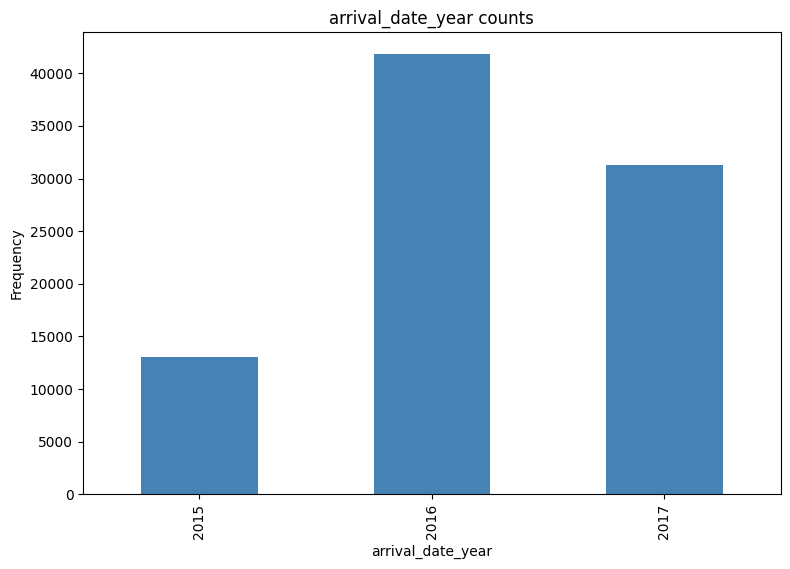

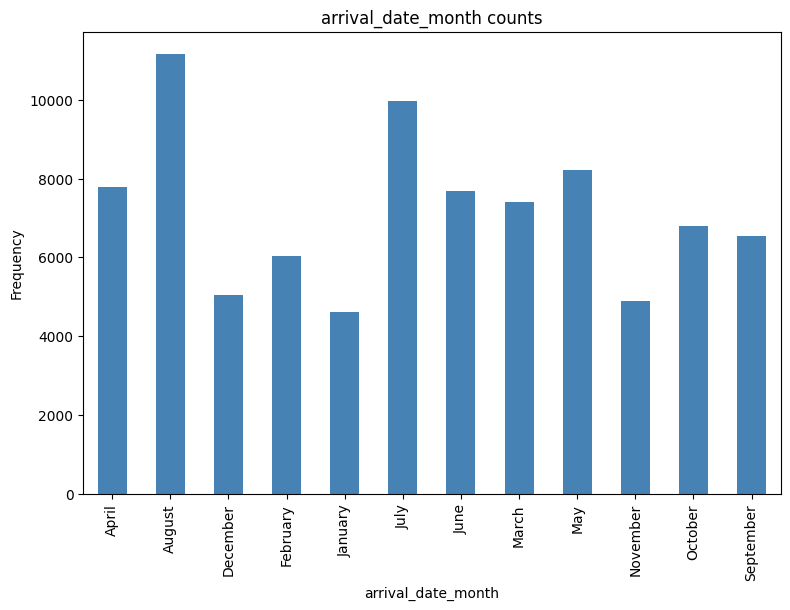

___________________________________________________________________________
The unique variables in arrival_date_day_of_month are too large
___________________________________________________________________________


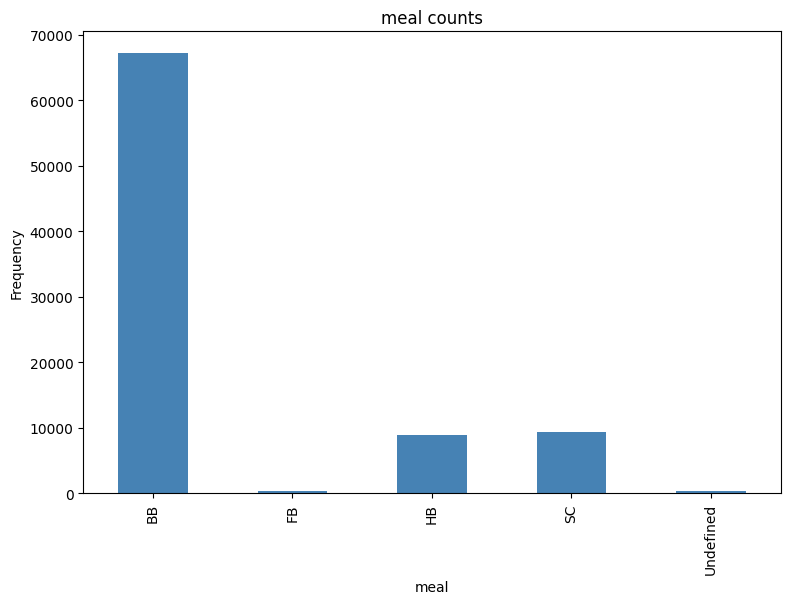

___________________________________________________________________________
The unique variables in country are too large
___________________________________________________________________________


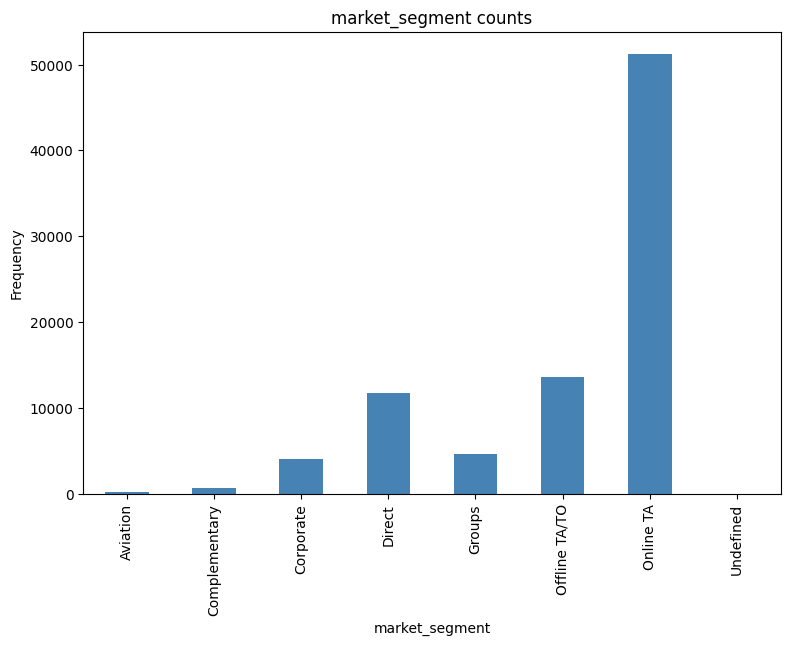

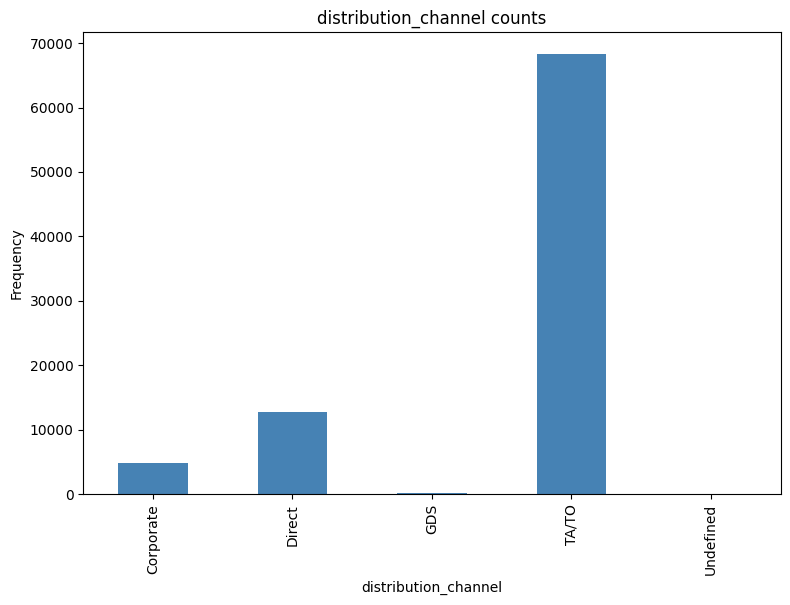

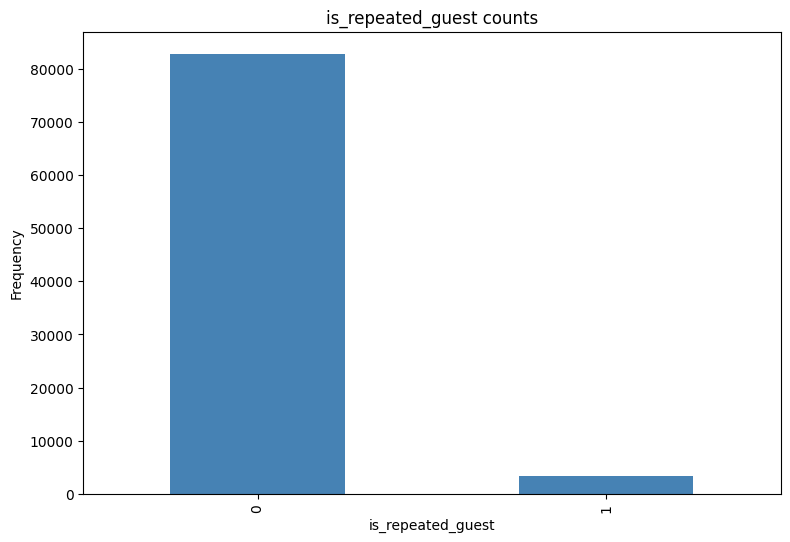

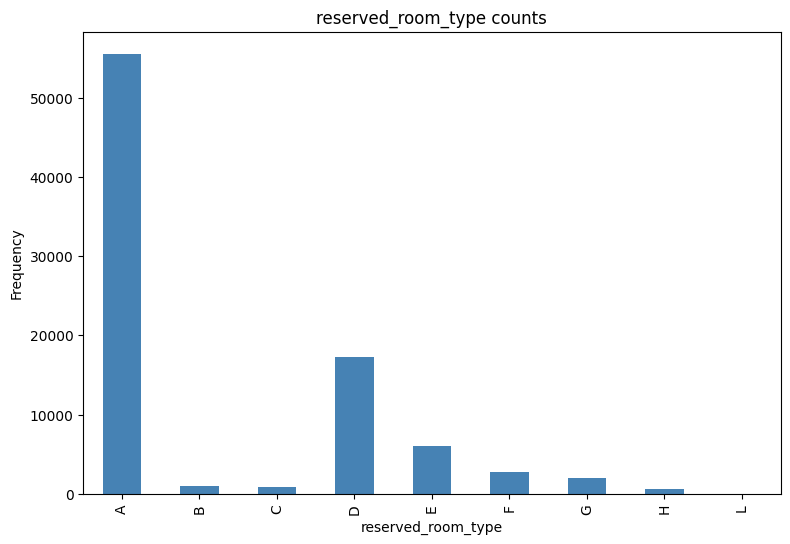

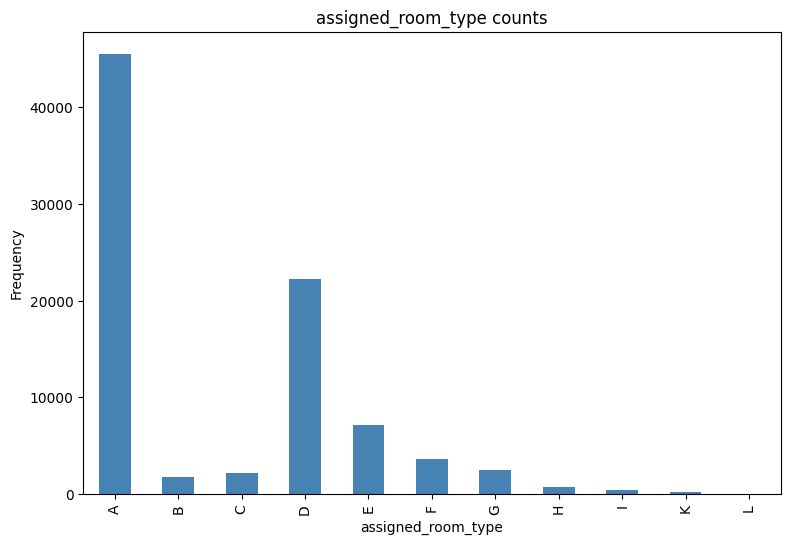

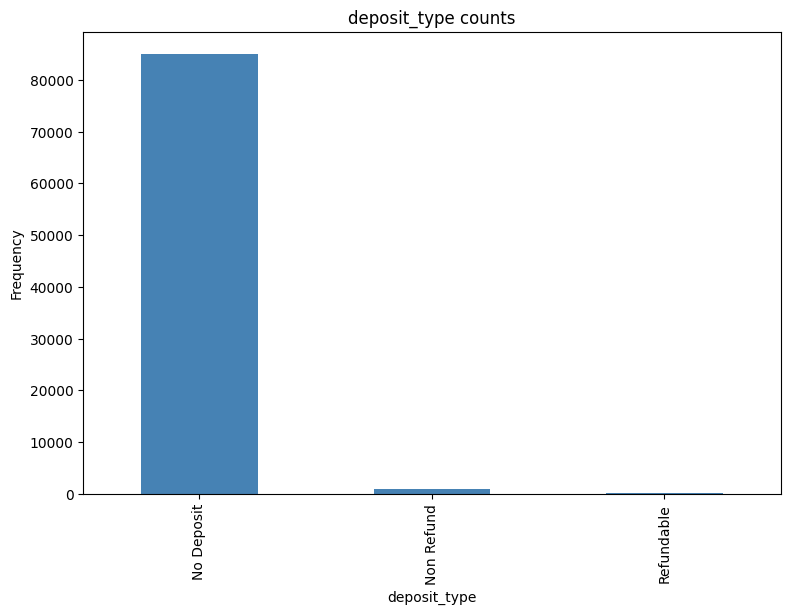

___________________________________________________________________________
The unique variables in agent are too large
___________________________________________________________________________


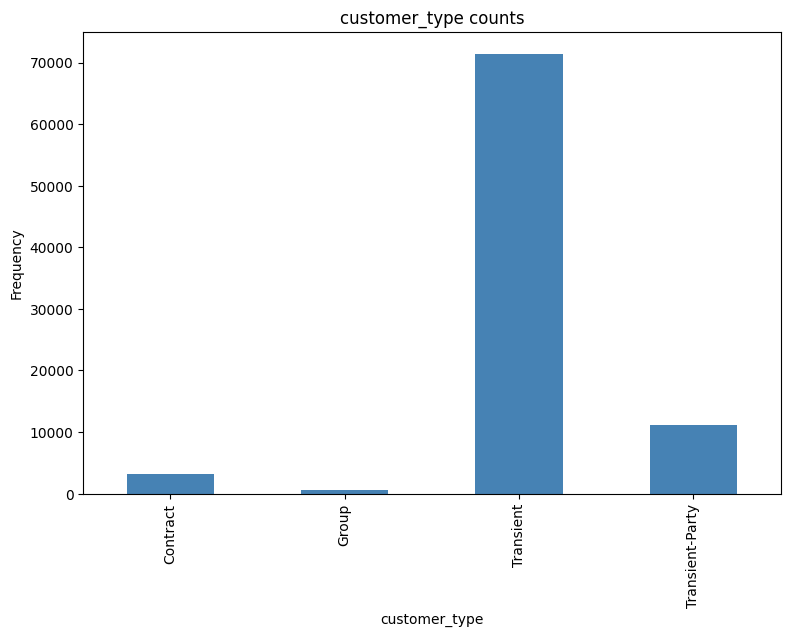

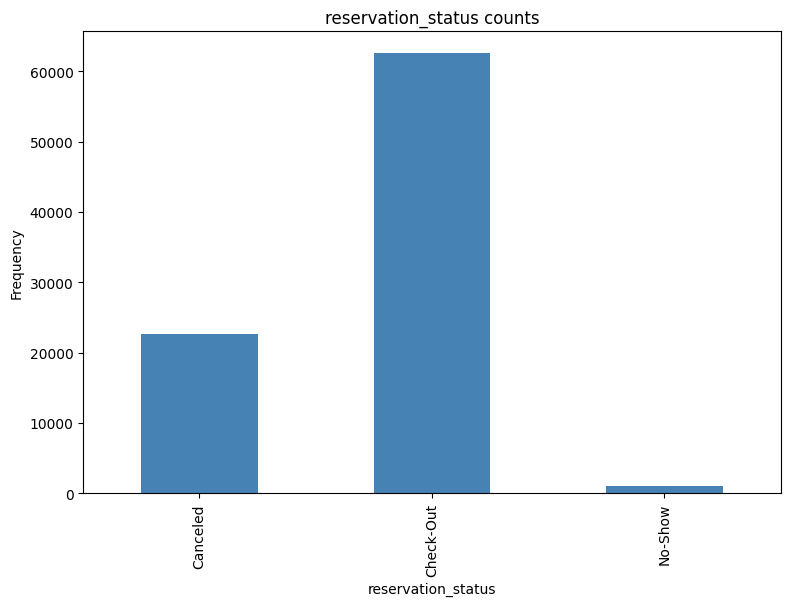

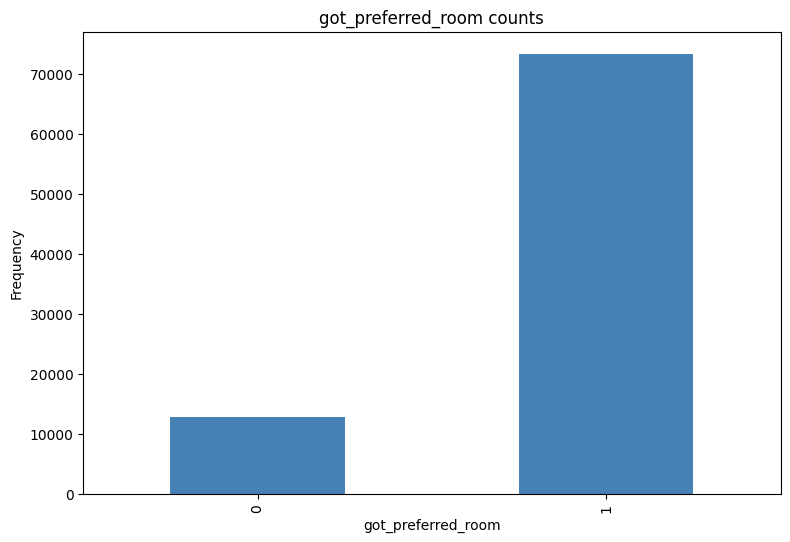

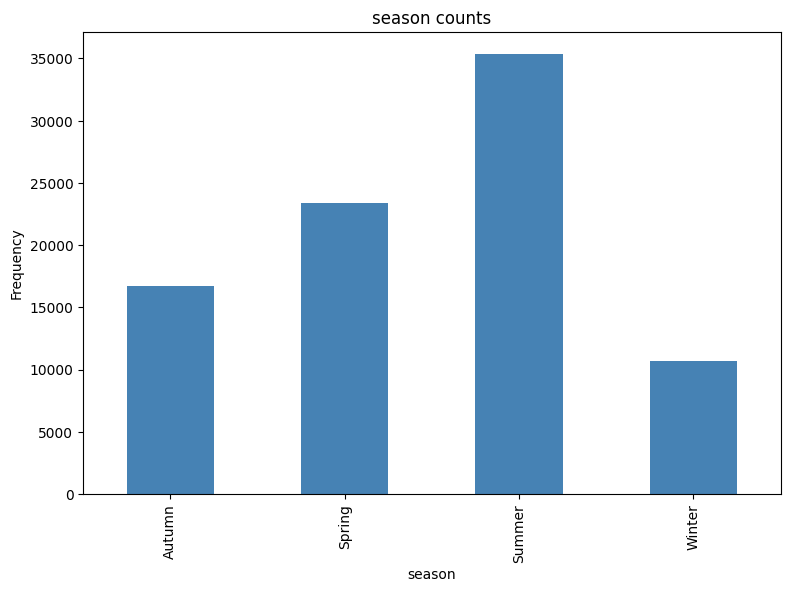

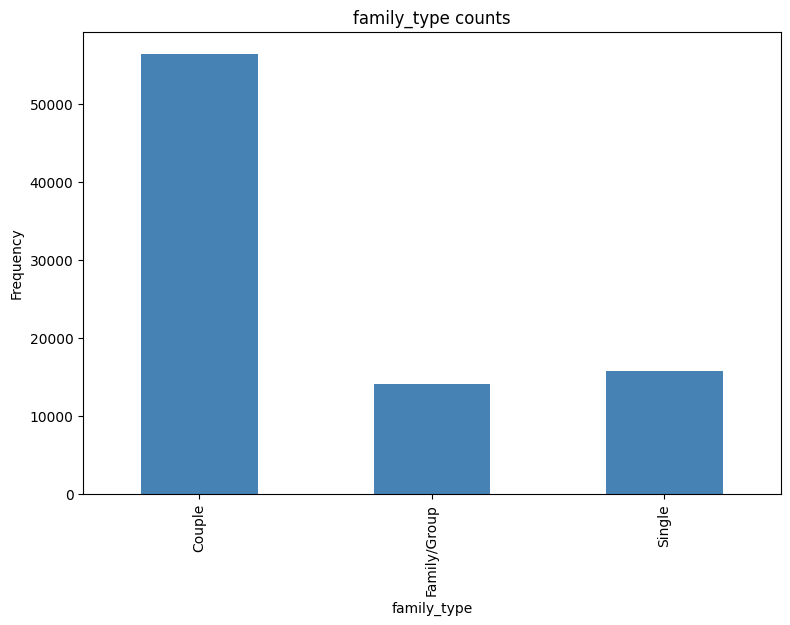

In [ ]:
for col in categorical:
  if hotel[col].nunique()<=20:
    counts = hotel[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax= fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()
  else:
    print('_'*75)
    print('The unique variables in ' + col + ' are too large')
    print('_'*75)

## Inferences from the basic categorical describe
*   City hotel has higher number of bookings compared to Resort Hotel.
*   Year 2016 has the highest number of bookings.
*   The preferred meal type was BB(Bread and Breakfast)
*   Online Tour Agents(Online TA) was the preferred market segment for booking among other 7 market segments.
*   Tour Agents/Tour Operators(TA/TO) was the preferred distribution channel for booking among 4 other distribution channel.
*   Preferred Room Type was 'A' Room Type.
*   Customers preferred bookings with 'No Deposits'.
*   Transiet customers were the most who did the bookings.

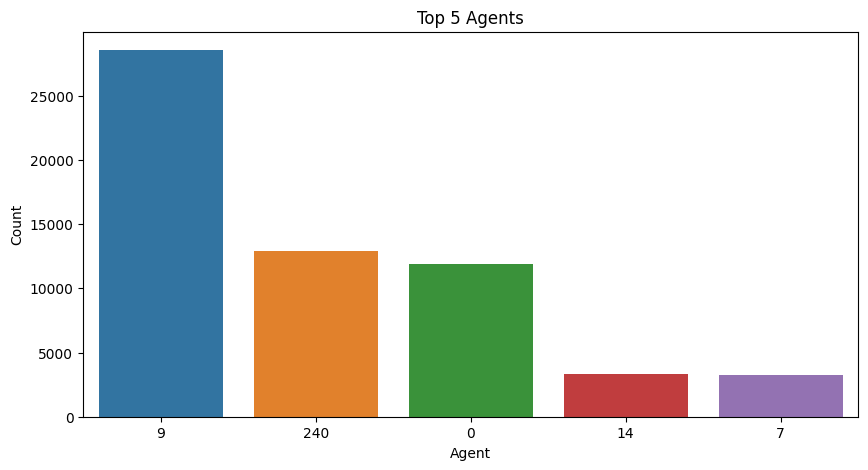

In [ ]:
# Lets check the top 5 agents that bring the most bookings
agents_data = hotel['agent'].value_counts().reset_index()
agents_data.rename(columns={'index':'Agent'}, inplace = True)
agents_data.rename(columns={'agent':'Count'}, inplace=True)
plt.figure(figsize=(10,5))
plt.title('Top 5 Agents')
sns.barplot(x= 'Agent', y ='Count', data= agents_data[:5])
plt.show()

# Inferences
* Agent 9 has brought in the most number of bookings.
* 0 represents the customers who have not made any bookings through any Agent.

<Axes: title={'center': 'Top 3 Months'}, xlabel='Month', ylabel='Count'>

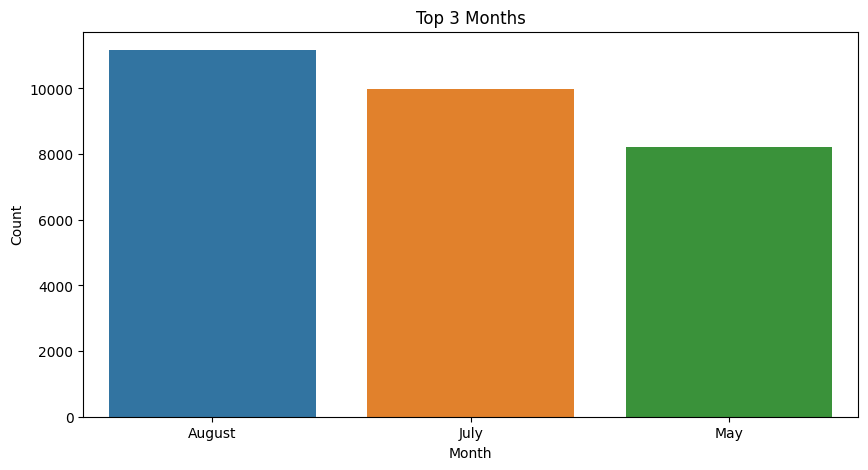

In [ ]:
# Finding top 3 months which highest number of bookings.
month_data = hotel['arrival_date_month'].value_counts().reset_index()
month_data.rename(columns={'index':'Month'}, inplace = True)
month_data.rename(columns={'arrival_date_month':'Count'}, inplace=True)
plt.figure(figsize=(10,5))
plt.title('Top 3 Months')
sns.barplot(x= 'Month', y ='Count', data= month_data[:3])

From the figure we see that the months near the fall of spring and start of Summer performs best.

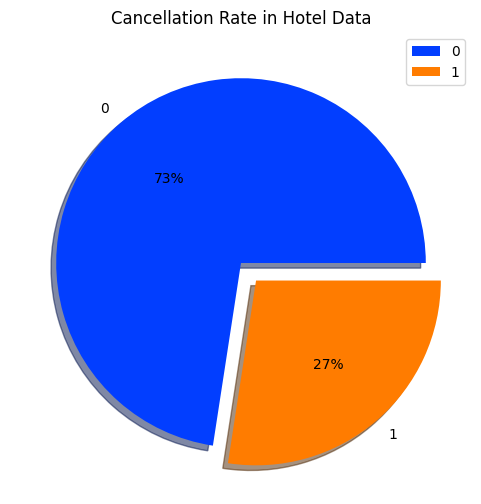

In [ ]:
# Plotting a pie chart to see cancellations data
cancellation_df = pd.DataFrame(hotel['is_canceled'].value_counts().reset_index())
cancellation_df.rename(columns={'index':'label','is_canceled':'Count'},inplace =True)
label = cancellation_df['label'].tolist()
count = cancellation_df['Count'].tolist()
explode = [0,0.125]
colors = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.pie(count, labels=label, colors=colors, autopct='%.0f%%',explode=explode, shadow=True)
plt.title('Cancellation Rate in Hotel Data')
plt.legend()
plt.show()

We see that there are 28% cancellations in the overall bookings.

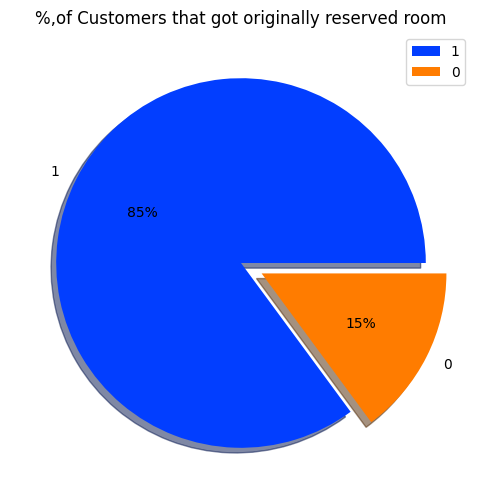

In [ ]:
# Checking the percentage of customers whose rooms were changed.
got_preferred_room = pd.DataFrame(hotel['got_preferred_room'].value_counts().reset_index())
got_preferred_room.rename(columns={'index':'label','got_preferred_room':'Count'}, inplace =True)
room_label = got_preferred_room['label'].tolist()
room_count = got_preferred_room['Count'].tolist()
explode = [0,0.125]
colors = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.pie(room_count, labels=room_label, colors=colors, autopct='%.0f%%',explode=explode, shadow=True)
plt.title('%,of Customers that got originally reserved room')
plt.legend()
plt.show()

13% Customers were assigned a different room from what they had originally booked.

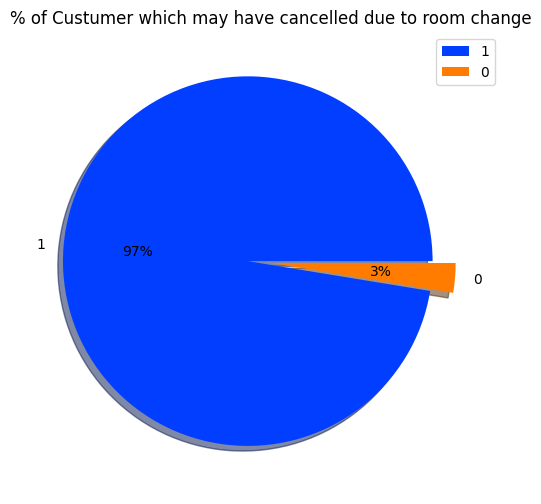

In [ ]:
# Checking if the Room change was responsible for cancellations.
cancellations = hotel.loc[hotel['is_canceled']=='1']
room_change = pd.DataFrame(cancellations['got_preferred_room'].value_counts().reset_index())
room_change.rename(columns={'index':'label','got_preferred_room':'Count'}, inplace =True)
preferrence_label = room_change['label'].tolist()
preferrence_count = room_change['Count'].tolist()
explode = [0.125,0]
colors = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.pie(preferrence_count, labels=preferrence_label, colors=colors, autopct='%.0f%%',explode=explode, shadow=True)
plt.title('% of Custumer which may have cancelled due to room change')
plt.legend()
plt.show()

Data shows that there are 98% customers have cancellations when their reserved room type was changed. As the percentage of cancellations is high we can say with conviction that room change after booking can be one of the important factors that affect cancellations.

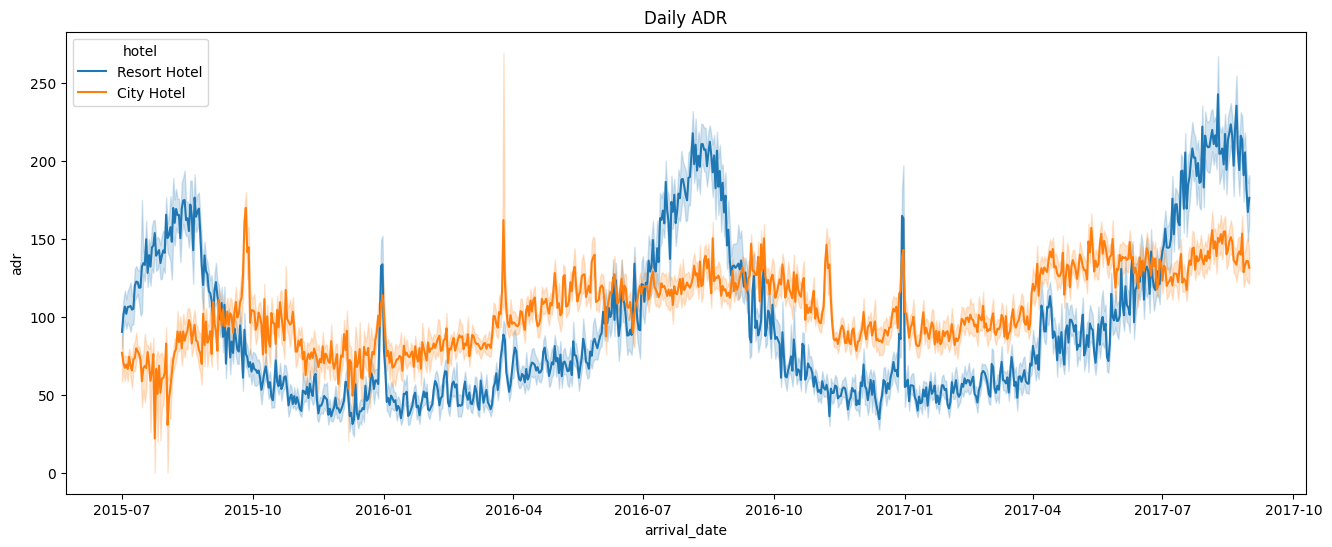

In [ ]:
# Plotting a lineplot to see daily adr over the period of time.
plt.figure(figsize=(16, 6))
sns.lineplot(data = hotel, x = hotel['arrival_date'], y= hotel['adr'], hue=hotel['hotel'])
plt.title('Daily ADR')
plt.show()

## Inference
*  From the Daily ADR Trend it can be seen that ADR is higher for Resort Hotel during the spring season.
*  Daily ADR for City Hotel is Higher during the wet season.
*  There is a spike in ADR in both the hotels during the holiday season when can be seen near 1st January.

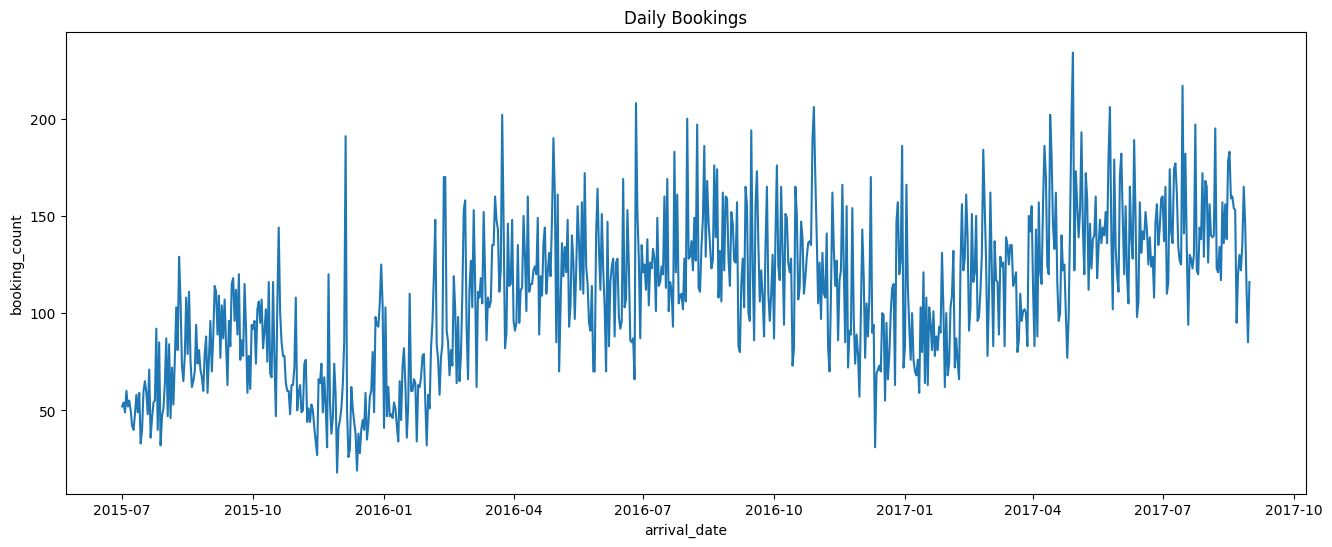

In [ ]:
# Plotting a lineplot to look at the booking trend.
daily_booking = pd.DataFrame(hotel.groupby('arrival_date')['hotel'].agg(lambda x: x.count()).reset_index())
daily_booking.rename(columns={'index':'arrival_date'},inplace=True)
daily_booking.rename(columns={'hotel':'booking_count'},inplace=True)
plt.figure(figsize=(16,6))
sns.lineplot(data = daily_booking, x=daily_booking['arrival_date'], y =daily_booking['booking_count'])
plt.title('Daily Bookings')
plt.show()

## Inference
*  From the Daily Booking trend it is conclusive that there is a seasonality in bookings.
*  The number of bookings are higher in spring season.
*  There is spike in bookings during holiday season.

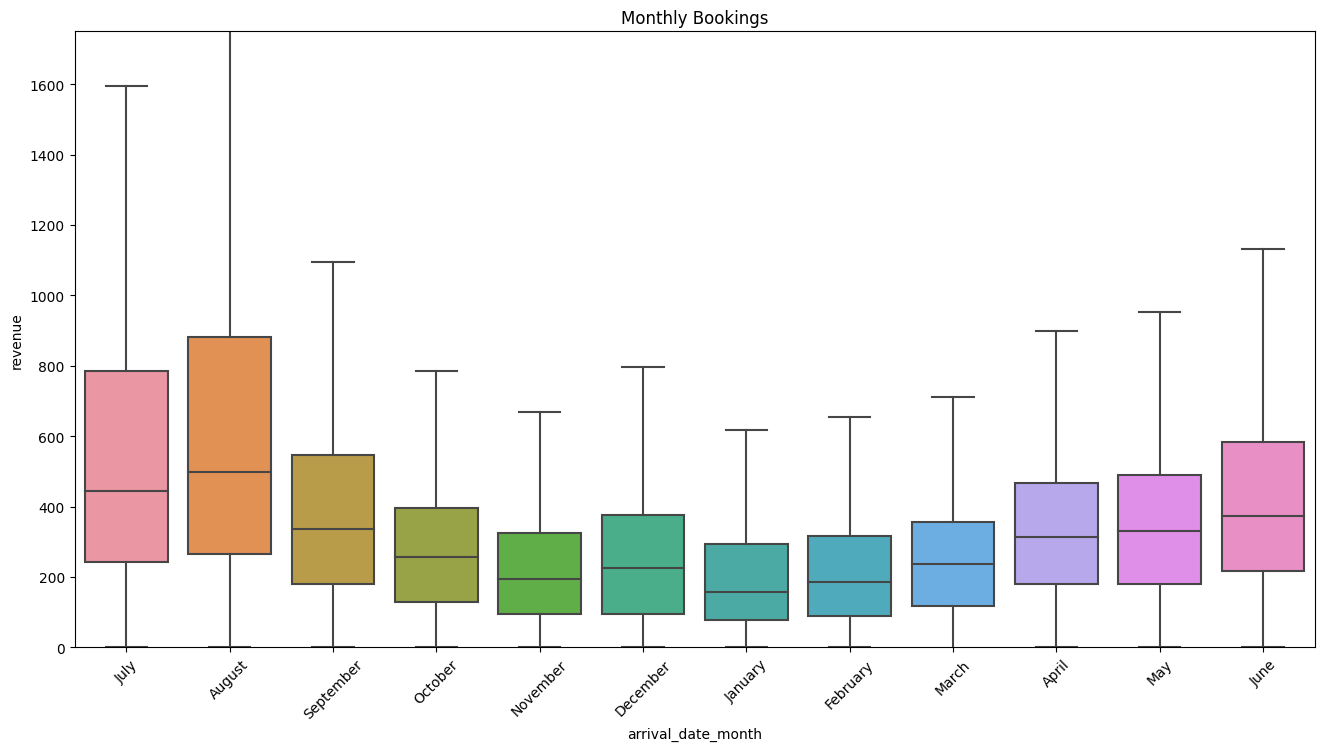

In [ ]:
# Looking at the boxplot trend to find the best months for hotel business in terms of revenue.
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x= hotel['arrival_date_month'],y = hotel['revenue'], data= hotel, showfliers= False)
fig.axis(ymin =0, ymax=1750);
plt.xticks(rotation=45);
plt.title('Monthly Bookings')
plt.show()

Box Plot trend also suggests that the months closer to spring have higher revenue.

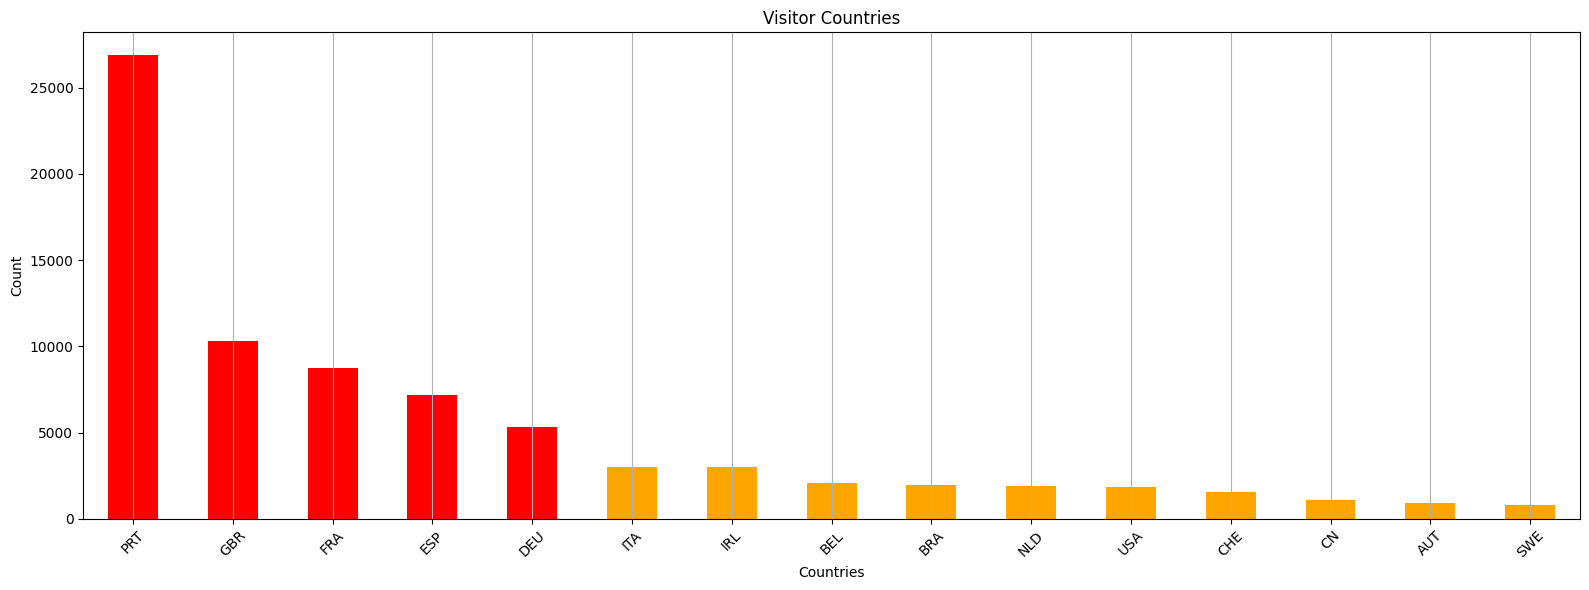

In [ ]:
# Plotting the top 15 countries in terms of bookings and highlighting top 5 countries.
mask = hotel['country'].value_counts().index
clrs = ['red' if (x in mask[:5]) else 'orange' for x in mask]
hotel['country'].value_counts()[:15].plot(kind='bar', figsize =(16,6), color=clrs)
plt.grid(axis = 'x')
plt.title('Visitor Countries')
plt.ylabel('Count')
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.tight_layout()

# **Conclusion**


Analyzing the hotel booking data can provide valuable information that helps the client make better decisions and achieve their business goals. By understanding market segments, pricing strategies, customer preferences, and operational efficiency, the client can increase revenue, satisfy customers, and stay competitive in the market.

To achieve these objectives, it is important for the client to use the data and insights effectively. They should regularly monitor market trends, competitors, and customer preferences to adapt their strategies accordingly. Integrating data analysis into their business processes and using visualization tools can help them make informed decisions.

Overall, by using data and insights, the client can grow their business, improve efficiency, and have a positive impact on their hotel's success.

## Top 5 Countries in terms of visitors are as follows:-
* **Portugal**
* **France**
* **Great Britan**
* **Spain**
* **Germany**

### **Done! Here we conclude our Exploratory Data Analysis on Hotel Bookings**